In [17]:
import pandas as pd
import networkx as nx

In [18]:
import matplotlib.pyplot as plt
import nxviz.plots as nv

In [19]:
import nxviz as nv
from nxviz import annotate

In [20]:
ch_01 = pd.read_csv("/Users/hernanadasme/Documents/data_challenges/challen_01.csv")

In [21]:
ch_01.drop(['Unnamed: 0'], axis=1, inplace=True)


In [22]:
ch_01

,Challenge H-ID,rec_Title_left,Source,Source year,Boxers challenging H-ID,rec_Title.1_left,Club Affiliation H-ID_left,rec_Title.2,Boxer Challenged H-ID_right,rec_Title_right,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",NaN,NaN,272,"Pérez, Amador",NaN,NaN
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",NaN,NaN,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",NaN,NaN,827,"Gallardo, Pedro",NaN,NaN
5,986,Silva\nIñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",NaN,NaN,987,"Iñiguez, Mario",NaN,NaN
6,988,Flores\nFarrafino,Los Sports,1924-03-07,302,"Flores, Sara",NaN,NaN,303,"Farrafino, Clementina",NaN,NaN
7,993,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",NaN,NaN,573,"Giaverini, Oscar",NaN,NaN
8,994,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",NaN,NaN,573,"Giaverini, Oscar",NaN,NaN
9,1000,Tapia\nInostroza,Los Sports,1924-03-07,158,"Tapia, Julio",NaN,NaN,1001,"Inostroza, Ruperto",NaN,NaN


In [53]:
ch_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Challenge H-ID               38 non-null     int64  
 1   rec_Title_left               38 non-null     object 
 2   Source                       38 non-null     object 
 3   Source year                  38 non-null     object 
 4   challenging_id               38 non-null     object 
 5   rec_Title.1_left             38 non-null     object 
 6   Club Affiliation H-ID_left   5 non-null      float64
 7   rec_Title.2                  5 non-null      object 
 8   challenged_id                38 non-null     object 
 9   rec_Title_right              38 non-null     object 
 10  Club Affiliation H-ID_right  3 non-null      float64
 11  rec_Title.1_right            3 non-null      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.7+ KB


In [39]:
ch_01.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)

In [42]:
ch_01.rename({'Boxer Challenged H-ID_right': 'challenged_id'}, axis = 1, inplace=True)

In [66]:
ch_01.rename({'rec_Title_right': 'challenged_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title.1_left': 'challenging_name'}, axis = 1, inplace=True)


In [68]:
ch_01.rename({'rec_Title_left': 'challenge'}, axis = 1, inplace=True)

In [69]:
ch_01.head(2)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club


In [52]:
ch_01 = ch_01.astype({"challenging_id": str, "challenged_id": str})

>**CREATE AN EDGELIST**

Convert data into an edgelist. First the source and then the node. 

In [54]:
G = nx.from_pandas_edgelist(ch_01, source='challenging_id', target='challenged_id')

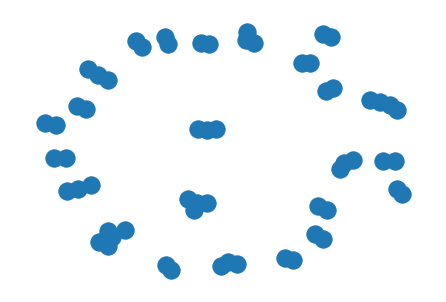

In [55]:
nx.draw(G)
plt.show()

In [56]:
G.edges()

EdgeView([('865', '836'), ('882', '780'), ('882', '976'), ('833', '272'), ('833', '827'), ('189', '987'), ('302', '303'), ('891', '573'), ('573', '143'), ('158', '1001'), ('1003', '321'), ('647', '423'), ('647', '1006'), ('647', '1008'), ('332', '1010'), ('332', '1012'), ('502', '1014'), ('143', '572'), ('77', '146'), ('146', '939'), ('639', '1021'), ('639', '735'), ('639', '1024'), ('639', '1026'), ('732', '223'), ('732', '733'), ('163', '1031'), ('162', '1035'), ('175', '98'), ('174', '1038'), ('177', '1040'), ('178', '126'), ('185', '1043'), ('933', '934'), ('935', '936'), ('935', '1048'), ('937', '938')])

In [57]:
G.nodes()

NodeView(('865', '836', '882', '780', '833', '272', '976', '827', '189', '987', '302', '303', '891', '573', '158', '1001', '1003', '321', '647', '423', '1006', '1008', '332', '1010', '1012', '502', '1014', '143', '572', '77', '146', '639', '1021', '735', '1024', '1026', '732', '223', '733', '163', '1031', '162', '1035', '175', '98', '174', '1038', '177', '1040', '178', '126', '185', '1043', '933', '934', '935', '936', '1048', '937', '938', '939'))

In [11]:
from random import randint

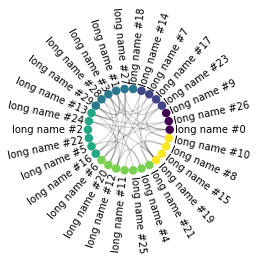

In [12]:
'''G = nx.erdos_renyi_graph(n=30, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = randint(0, 5)
G = nx.relabel_nodes(G, {i: "long name #" + str(i) for i in range(len(G))})
nv.circos(G, group_by="group", node_color_by="group")
annotate.circos_labels(G, group_by="group", layout="rotate")
# The rotated labels take up more space, so we will have to increase the
# padding a bit. 5% on all sides works well here.
plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
plt.show()'''

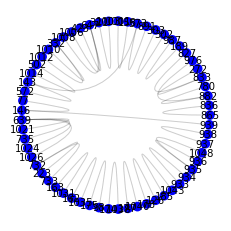

In [27]:
gr_01 = nv.circos(G)
annotate.circos_labels(G)

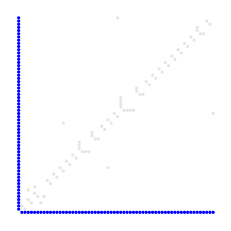

In [28]:
ax = nv.matrix(G)

>**SET OPERATIONS**

In [29]:
G.nodes(data=True)

NodeDataView({865: {}, 836: {}, 882: {}, 780: {}, 833: {}, 272: {}, 976: {}, 827: {}, 189: {}, 987: {}, 302: {}, 303: {}, 891: {}, 573: {}, 158: {}, 1001: {}, 1003: {}, 321: {}, 647: {}, 423: {}, 1006: {}, 1008: {}, 332: {}, 1010: {}, 1012: {}, 502: {}, 1014: {}, 143: {}, 572: {}, 77: {}, 146: {}, 639: {}, 1021: {}, 735: {}, 1024: {}, 1026: {}, 732: {}, 223: {}, 733: {}, 163: {}, 1031: {}, 162: {}, 1035: {}, 175: {}, 98: {}, 174: {}, 1038: {}, 177: {}, 1040: {}, 178: {}, 126: {}, 185: {}, 1043: {}, 933: {}, 934: {}, 935: {}, 936: {}, 1048: {}, 937: {}, 938: {}, 939: {}})

In [30]:
G.edges()

EdgeView([(865, 836), (882, 780), (882, 976), (833, 272), (833, 827), (189, 987), (302, 303), (891, 573), (573, 143), (158, 1001), (1003, 321), (647, 423), (647, 1006), (647, 1008), (332, 1010), (332, 1012), (502, 1014), (143, 572), (77, 146), (146, 939), (639, 1021), (639, 735), (639, 1024), (639, 1026), (732, 223), (732, 733), (163, 1031), (162, 1035), (175, 98), (174, 1038), (177, 1040), (178, 126), (185, 1043), (933, 934), (935, 936), (935, 1048), (937, 938)])

In [63]:
boxer_935 = []
boxer_935 = G.neighbors('935')

In [65]:
print(boxer_935)

>**PROJECT**

In [70]:
G_ch = nx.Graph()

In [73]:
# Iterating through the DataFrame to add edges
for node, edge in ch_01.iterrows():
    G_ch.add_edge(edge['challenging_id'], edge['challenged_id'])


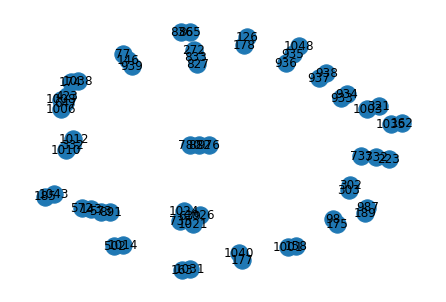

In [84]:
nx.draw(G_ch, with_labels = True, )
plt.show()

In [75]:
# Calculating the degree centrality of G_ch
deg_cen_G = nx.degree_centrality(G_ch)


In [76]:
deg_cen_G

{'865': 0.016666666666666666,
 '836': 0.016666666666666666,
 '882': 0.03333333333333333,
 '780': 0.016666666666666666,
 '833': 0.03333333333333333,
 '272': 0.016666666666666666,
 '976': 0.016666666666666666,
 '827': 0.016666666666666666,
 '189': 0.016666666666666666,
 '987': 0.016666666666666666,
 '302': 0.016666666666666666,
 '303': 0.016666666666666666,
 '891': 0.016666666666666666,
 '573': 0.03333333333333333,
 '158': 0.016666666666666666,
 '1001': 0.016666666666666666,
 '1003': 0.016666666666666666,
 '321': 0.016666666666666666,
 '647': 0.05,
 '423': 0.016666666666666666,
 '1006': 0.016666666666666666,
 '1008': 0.016666666666666666,
 '332': 0.03333333333333333,
 '1010': 0.016666666666666666,
 '1012': 0.016666666666666666,
 '502': 0.016666666666666666,
 '1014': 0.016666666666666666,
 '143': 0.03333333333333333,
 '572': 0.016666666666666666,
 '77': 0.016666666666666666,
 '146': 0.03333333333333333,
 '639': 0.06666666666666667,
 '1021': 0.016666666666666666,
 '735': 0.0166666666666666

In [80]:
# Sorting the dictionaries according to their degree centrality and extracting the top 10
sorted_deg_cen_G = sorted(deg_cen_G.items(), key=lambda x:x[1], reverse=True)

In [82]:
print(type(sorted_deg_cen_G))

<class 'list'>


In [83]:
sorted_deg_cen_G

[('639', 0.06666666666666667),
 ('647', 0.05),
 ('882', 0.03333333333333333),
 ('833', 0.03333333333333333),
 ('573', 0.03333333333333333),
 ('332', 0.03333333333333333),
 ('143', 0.03333333333333333),
 ('146', 0.03333333333333333),
 ('732', 0.03333333333333333),
 ('935', 0.03333333333333333),
 ('865', 0.016666666666666666),
 ('836', 0.016666666666666666),
 ('780', 0.016666666666666666),
 ('272', 0.016666666666666666),
 ('976', 0.016666666666666666),
 ('827', 0.016666666666666666),
 ('189', 0.016666666666666666),
 ('987', 0.016666666666666666),
 ('302', 0.016666666666666666),
 ('303', 0.016666666666666666),
 ('891', 0.016666666666666666),
 ('158', 0.016666666666666666),
 ('1001', 0.016666666666666666),
 ('1003', 0.016666666666666666),
 ('321', 0.016666666666666666),
 ('423', 0.016666666666666666),
 ('1006', 0.016666666666666666),
 ('1008', 0.016666666666666666),
 ('1010', 0.016666666666666666),
 ('1012', 0.016666666666666666),
 ('502', 0.016666666666666666),
 ('1014', 0.016666666666666

In [ ]:
G_02 = nx.from_pandas_edgelist(ch_01, source='challenging_id', target='challenged_id')

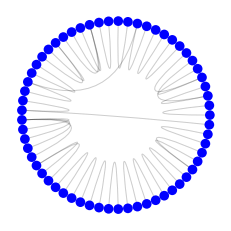

In [88]:
gr_01 = nv.circos(G_ch)

In [ ]:
G = nx.erdos_renyi_graph(n=30, p=0.1)

In [89]:
ch_01.head(2)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club


In [91]:
A = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id', ['challenging_name', 'challenged_name'])

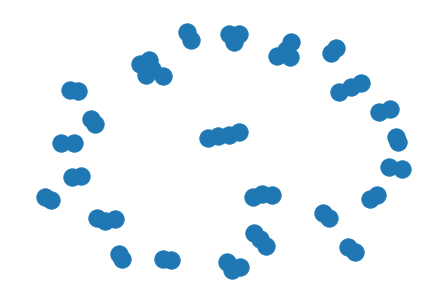

In [92]:
nx.draw(A)

In [93]:
A.nodes(data=True)

NodeDataView({'865': {}, '836': {}, '882': {}, '780': {}, '833': {}, '272': {}, '976': {}, '827': {}, '189': {}, '987': {}, '302': {}, '303': {}, '891': {}, '573': {}, '158': {}, '1001': {}, '1003': {}, '321': {}, '647': {}, '423': {}, '1006': {}, '1008': {}, '332': {}, '1010': {}, '1012': {}, '502': {}, '1014': {}, '143': {}, '572': {}, '77': {}, '146': {}, '639': {}, '1021': {}, '735': {}, '1024': {}, '1026': {}, '732': {}, '223': {}, '733': {}, '163': {}, '1031': {}, '162': {}, '1035': {}, '175': {}, '98': {}, '174': {}, '1038': {}, '177': {}, '1040': {}, '178': {}, '126': {}, '185': {}, '1043': {}, '933': {}, '934': {}, '935': {}, '936': {}, '1048': {}, '937': {}, '938': {}, '939': {}})

In [94]:
A.edges(data=True)

EdgeDataView([('865', '836', {'challenging_name': 'Castillo, Ernesto', 'challenged_name': 'Baeza, Florencio'}), ('882', '780', {'challenging_name': 'Araya, Manuel', 'challenged_name': 'Bolli, Carlos'}), ('882', '976', {'challenging_name': 'Ortiz, Rafael', 'challenged_name': 'Araya, Manuel'}), ('833', '272', {'challenging_name': 'Valdes, Mario', 'challenged_name': 'Pérez, Amador'}), ('833', '827', {'challenging_name': 'Valdes, Mario', 'challenged_name': 'Gallardo, Pedro'}), ('189', '987', {'challenging_name': 'Silva, Carlos', 'challenged_name': 'Iñiguez, Mario'}), ('302', '303', {'challenging_name': 'Flores, Sara', 'challenged_name': 'Farrafino, Clementina'}), ('891', '573', {'challenging_name': 'Huerta, Francisco', 'challenged_name': 'Giaverini, Oscar'}), ('573', '143', {'challenging_name': 'Caldera, Francisco', 'challenged_name': 'Giaverini, Oscar'}), ('158', '1001', {'challenging_name': 'Tapia, Julio', 'challenged_name': 'Inostroza, Ruperto'}), ('1003', '321', {'challenging_name': 'A

In [96]:
ch_01.head(2)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club


In [99]:
A.edges(data=True)

EdgeDataView([('865', '836', {'challenging_name': 'Castillo, Ernesto', 'challenged_name': 'Baeza, Florencio'}), ('882', '780', {'challenging_name': 'Araya, Manuel', 'challenged_name': 'Bolli, Carlos'}), ('882', '976', {'challenging_name': 'Ortiz, Rafael', 'challenged_name': 'Araya, Manuel'}), ('833', '272', {'challenging_name': 'Valdes, Mario', 'challenged_name': 'Pérez, Amador'}), ('833', '827', {'challenging_name': 'Valdes, Mario', 'challenged_name': 'Gallardo, Pedro'}), ('189', '987', {'challenging_name': 'Silva, Carlos', 'challenged_name': 'Iñiguez, Mario'}), ('302', '303', {'challenging_name': 'Flores, Sara', 'challenged_name': 'Farrafino, Clementina'}), ('891', '573', {'challenging_name': 'Huerta, Francisco', 'challenged_name': 'Giaverini, Oscar'}), ('573', '143', {'challenging_name': 'Caldera, Francisco', 'challenged_name': 'Giaverini, Oscar'}), ('158', '1001', {'challenging_name': 'Tapia, Julio', 'challenged_name': 'Inostroza, Ruperto'}), ('1003', '321', {'challenging_name': 'A

In [105]:
ch_01.head(5)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",NaN,NaN,272,"Pérez, Amador",NaN,NaN
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",NaN,NaN,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",NaN,NaN,827,"Gallardo, Pedro",NaN,NaN


In [101]:
B = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id')

In [104]:
for box,row in ch_01.iterrows():
    B.nodes[row['challenging_id']]['name'] = row['challenging_name']
    B.nodes[row['challenged_id']]['name'] = row['challenged_name']
print(B.nodes(data=True))

[('865', {'name': 'Castillo, Ernesto'}), ('836', {'name': 'Baeza, Florencio'}), ('882', {'name': 'Araya, Manuel'}), ('780', {'name': 'Bolli, Carlos'}), ('833', {'name': 'Valdes, Mario'}), ('272', {'name': 'Pérez, Amador'}), ('976', {'name': 'Ortiz, Rafael'}), ('827', {'name': 'Gallardo, Pedro'}), ('189', {'name': 'Silva, Carlos'}), ('987', {'name': 'Iñiguez, Mario'}), ('302', {'name': 'Flores, Sara'}), ('303', {'name': 'Farrafino, Clementina'}), ('891', {'name': 'Huerta, Francisco'}), ('573', {'name': 'Giaverini, Oscar'}), ('158', {'name': 'Tapia, Julio'}), ('1001', {'name': 'Inostroza, Ruperto'}), ('1003', {'name': 'Alley, Juan'}), ('321', {'name': 'Salinas, Juan'}), ('647', {'name': 'Olguín, Humberto'}), ('423', {'name': 'Valdenegro'}), ('1006', {'name': 'Henriquez'}), ('1008', {'name': 'Leiva'}), ('332', {'name': 'Acosta, Luis J.'}), ('1010', {'name': 'Molina, Erasmo'}), ('1012', {'name': 'Parra, Routier'}), ('502', {'name': 'Rios, Agustin'}), ('1014', {'name': 'Arratia, Jose'}), ('

In [106]:
len(B.nodes)

61